# Social Network Analysis Project - 9/11 Hijackers Dataset

In [ ]:
# !pip install python-louvain
!pip install cpnet

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import numpy as np
import community.community_louvain as community # !pip install python-louvain
import random
import cpnet # !pip install cpnet

In [ ]:
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/Università Bolo/9_11_HIJACKERS_COMPLETE.csv', index_col=0, dtype={"Network Strength": int,
                                                                                                            "Ties": int,
                                                                                                            "Las Vegas Meeting": int})

In [ ]:
df.head(60)

,Majed Moqed,Khalid Al-Mihdhar,Hani Hanjour,Nawaf Alhazmi,Salem Alhazmi*,Ahmed Alnami,Ahmed Alghamdi,Saeed Alghamdi*,Hamza Alghamdi,Ahmed Al Haznawi,...,Essid Sami Ben Khemail,Seifallah ben Hassine,Essoussi Laaroussi,Fahid al Shakri,Madjid Sahoune,Samir Kishk,Kamel Daoudi,Network Strength,Ties,Las Vegas Meeting
Majed Moqed,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
Khalid Al-Mihdhar,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
Hani Hanjour,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
Nawaf Alhazmi,0,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,2,1
Salem Alhazmi*,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
Ahmed Alnami,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,3,0
Ahmed Alghamdi,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,4,0
Saeed Alghamdi*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,0
Hamza Alghamdi,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,1,4,0
Ahmed Al Haznawi,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,3,0


In [ ]:
# Convert the DataFrame to a NumPy array

df_graph = df.iloc[:, :-3]  # We need to remove the last 3 columns in order to have a square adjacency_matrix
adjacency_matrix = df_graph.values

In [ ]:
# Since we have an undirected graph, we need to have a mirrored adjacency matrix across the diagonal. To do so we check if a reversed edge
# exists for each edge

n = len(adjacency_matrix)  # Number of vertices
c = 0

for i in range(n):
    for j in range(n):
        if adjacency_matrix[i][j] == 1:
            # Edge from i to j exists, check if reversed edge exists
            if adjacency_matrix[j][i] != 1:
                c += 1
                # print(f"Reversed edge doesn't exist for edge ({i}, {j})")
                # If the reversed edge doesn't exist we need to set one
                adjacency_matrix[j][i] = 1
            else:
                c += 1
                # print(f"Edge ({i}, {j}) has a corresponding reversed edge")

## Creating and visualizing the corresponding graph

In [ ]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# print("Nodes:", G.nodes())
# print("Edges:", G.edges())

Since all the names won't fit on the graphic visualization of the graph, we decided to use their initials instead. They're ordered according to the order of the names in the dataframe

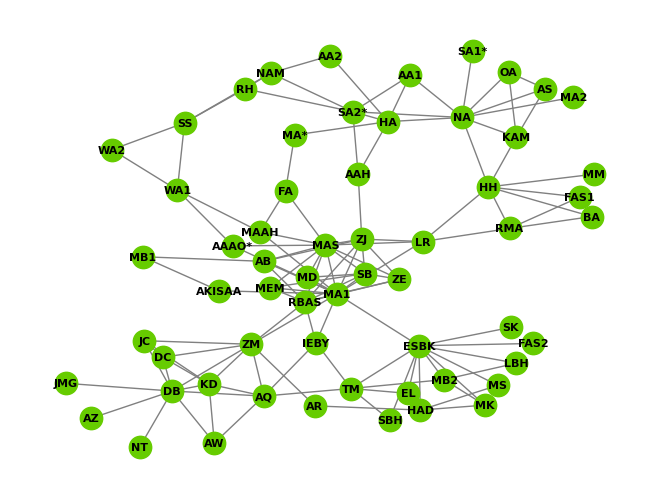

In [ ]:
names = ["MM", "KAM", "HH", "NA", "SA1*", "AA1", "AA2", "SA2*", "HA", "AAH", "MA*", "FA", "ZJ", "MAS", "MA1", "AAAO*", "WA1", "WA2", "SS", "RH", "NAM", "MAAH", "MD", "ZE", "SB", "MEM", "ZM", "RBAS", "AB", "AKISAA", "LR", "RMA", "BA", "FAS1", "OA", "AS", "MA2", "MB1", "IEBY", "TM", "AQ", "DB", "JC", "DC", "AR", "AW", "JMG", "AZ", "NT", "HAD", "MK", "MB2", "LBH", "ESBK", "SBH", "EL", "FAS2", "MS", "SK", "KD"]

# Set node names as attributes
name_dict = {i: name for i, name in enumerate(names)}
nx.set_node_attributes(G, name_dict, 'name')

# Use Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Visualization
labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, node_color='#66cc00', labels=labels, with_labels=True, font_weight='bold', node_size=260, font_size=8, edge_color='gray')

plt.show()

We update the graph regrouping and colouring the various nodes according to their roles in the attacks. This is made possible using the "Ties" column of the dataframe.

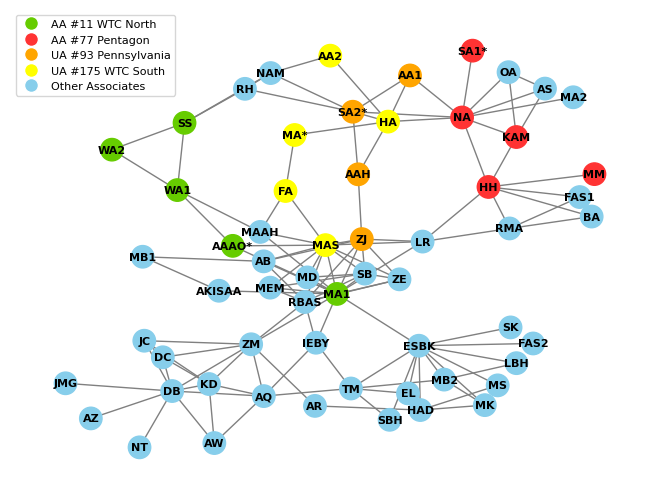

In [ ]:
# Define a custom colormap
colors = ['#66cc00', '#ff3333', 'orange', 'yellow', 'skyblue']
cmap = ListedColormap(colors)

# Get the "Ties" column values as a dictionary for coloring nodes
attribute_values = df['Ties'].to_dict()

# Define legend labels
legend_labels = {
    1: 'AA #11 WTC North',
    2: 'AA #77 Pentagon',
    3: 'UA #93 Pennsylvania',
    4: 'UA #175 WTC South',
    5: 'Other Associates'
}

# Visualization
labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, node_color=list(attribute_values.values()), cmap=cmap, labels=labels, with_labels=True,
        font_weight='bold', node_size=260, font_size=8, edge_color='gray')

# Add a legend based on the "Ties" values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                          label=legend_labels[value]) for value, color in zip(sorted(df['Ties'].unique()), colors)]

plt.legend(handles=legend_elements, loc='upper left', fontsize="8")
plt.show()

# Measures and Results

In [ ]:
# Custom plotting function used to show hisotgrams for the centrality measures

def plot_degree_histogram(centrality_list, labels, top_n, measure):
    # Extract top N nodes and their degree centrality values
    top_nodes = [labels[node] for node, _ in centrality_list[:top_n]]
    top_values = [value for _, value in centrality_list[:top_n]]

    custom_colors = ['#ea96a3', '#d7944e', '#ab9e47', '#7fa946', '#49ae83', '#4baba4', '#50acc3', '#94aee8', '#ce9be9', '#e88fcc']

    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.bar(top_nodes, top_values, color=custom_colors[:len(top_nodes)], align='center')
    plt.xlabel('Terrorists')
    plt.ylabel(measure)
    plt.title(f'Top {top_n} Terrorists by ' + measure)
    plt.xticks(fontsize=13, ha='center')
    plt.show()

## Degree Centrality
This measures the number of ties a node has. In an undirected network, the degree of a node is the number of edges connected to it. In our case, it can indicate the number of trusted prior contacts or other associates a person has.

In [ ]:
degree_centrality_list = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)

# Print the result with node labels
for node, centrality in degree_centrality_list:
    print(f"Node {node} {labels[node]}: -> {centrality}")

Node 14 MA1: -> 0.2542372881355932
Node 13 MAS: -> 0.2033898305084746
Node 53 ESBK: -> 0.1864406779661017
Node 3 NA: -> 0.15254237288135594
Node 27 RBAS: -> 0.15254237288135594
Node 41 DB: -> 0.15254237288135594
Node 12 ZJ: -> 0.13559322033898305
Node 26 ZM: -> 0.13559322033898305
Node 2 HH: -> 0.11864406779661017
Node 24 SB: -> 0.11864406779661017
Node 7 SA2*: -> 0.1016949152542373
Node 8 HA: -> 0.1016949152542373
Node 39 TM: -> 0.1016949152542373
Node 40 AQ: -> 0.1016949152542373
Node 59 KD: -> 0.1016949152542373
Node 23 ZE: -> 0.0847457627118644
Node 28 AB: -> 0.0847457627118644
Node 30 LR: -> 0.0847457627118644
Node 1 KAM: -> 0.06779661016949153
Node 16 WA1: -> 0.06779661016949153
Node 18 SS: -> 0.06779661016949153
Node 20 NAM: -> 0.06779661016949153
Node 21 MAAH: -> 0.06779661016949153
Node 25 MEM: -> 0.06779661016949153
Node 31 RMA: -> 0.06779661016949153
Node 38 IEBY: -> 0.06779661016949153
Node 42 JC: -> 0.06779661016949153
Node 43 DC: -> 0.06779661016949153
Node 49 HAD: -> 0.0

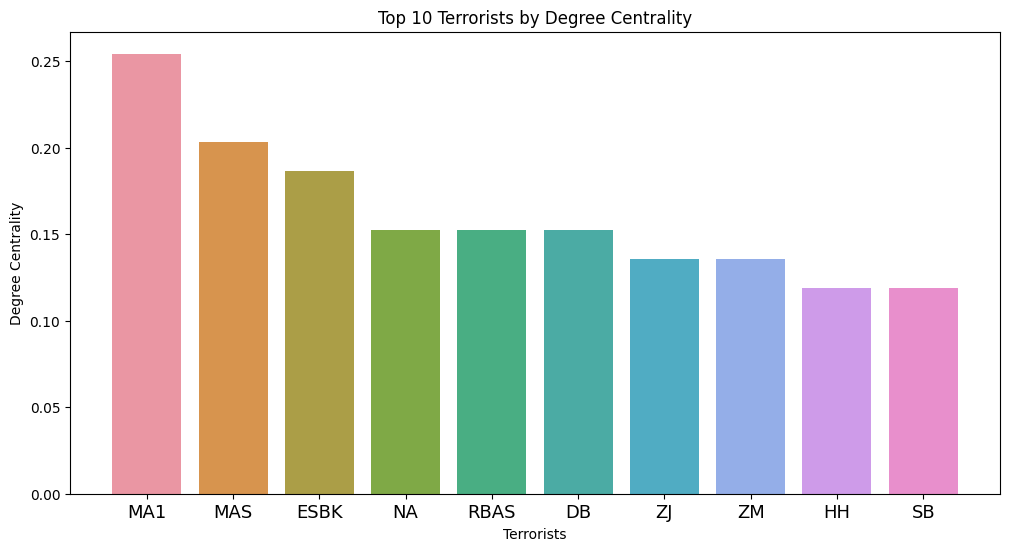

In [ ]:
# Call the custom plotting function
plot_degree_histogram(degree_centrality_list, labels, 10, "Degree Centrality")

## Closeness Centrality

Measures how close a node is to all other nodes in the network. It can show who is more central in terms of forming connections.

In [ ]:
closeness_centrality_list = sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True)

# Print the result with node labels
for node, centrality in closeness_centrality_list:
    print(f"Node {node} {labels[node]}: -> {centrality}")

Node 14 MA1: -> 0.44360902255639095
Node 13 MAS: -> 0.38064516129032255
Node 12 ZJ: -> 0.37579617834394907
Node 30 LR: -> 0.37579617834394907
Node 27 RBAS: -> 0.36419753086419754
Node 26 ZM: -> 0.35119047619047616
Node 53 ESBK: -> 0.35119047619047616
Node 21 MAAH: -> 0.34104046242774566
Node 24 SB: -> 0.3352272727272727
Node 38 IEBY: -> 0.3352272727272727
Node 15 AAAO*: -> 0.3333333333333333
Node 28 AB: -> 0.3333333333333333
Node 23 ZE: -> 0.33146067415730335
Node 2 HH: -> 0.3241758241758242
Node 25 MEM: -> 0.3172043010752688
Node 9 AAH: -> 0.3155080213903743
Node 22 MD: -> 0.3155080213903743
Node 29 AKISAA: -> 0.31216931216931215
Node 11 FA: -> 0.30569948186528495
Node 31 RMA: -> 0.29949238578680204
Node 39 TM: -> 0.29064039408866993
Node 40 AQ: -> 0.29064039408866993
Node 7 SA2*: -> 0.28365384615384615
Node 3 NA: -> 0.2822966507177033
Node 8 HA: -> 0.2822966507177033
Node 41 DB: -> 0.2822966507177033
Node 16 WA1: -> 0.2796208530805687
Node 59 KD: -> 0.2783018867924528
Node 44 AR: -> 

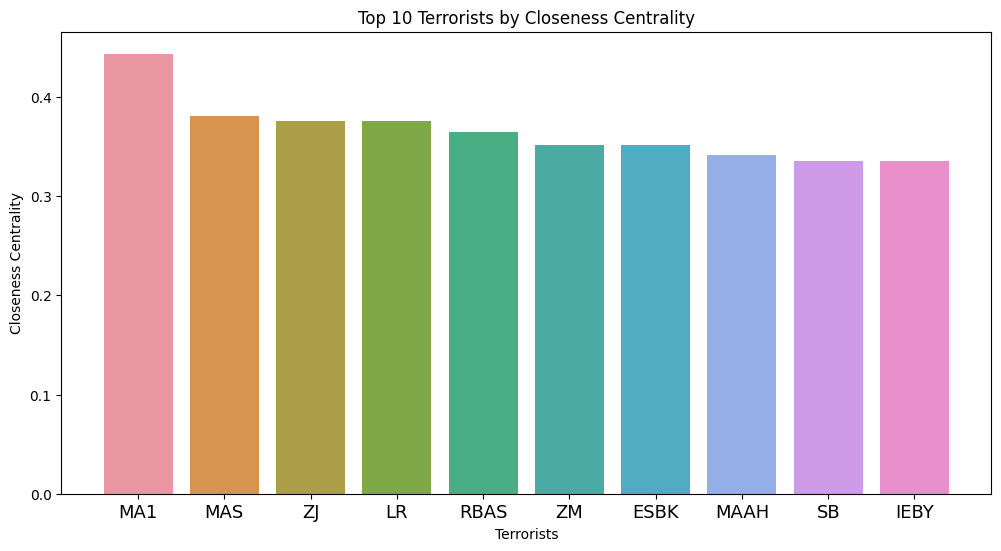

In [ ]:
# Call the custom plotting function
plot_degree_histogram(closeness_centrality_list, labels, 10, "Closeness Centrality")

## Betweenness Centrality

Identifies nodes that act as bridges between different groups. In the context of terrorism networks, this can help identify individuals who play a crucial role in connecting disparate elements.

In [ ]:
betweenness_centrality_list = sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)

# Print the result with node labels
for node, centrality in betweenness_centrality_list:
    print(f"Node {node} {labels[node]}: -> {centrality}")

Node 14 MA1: -> 0.5116174688354699
Node 53 ESBK: -> 0.25424633324984
Node 30 LR: -> 0.23954389009912122
Node 26 ZM: -> 0.23029417494642507
Node 2 HH: -> 0.21193820141803804
Node 3 NA: -> 0.14435589087839223
Node 12 ZJ: -> 0.13182505526164195
Node 41 DB: -> 0.10835768556399766
Node 9 AAH: -> 0.10419014390376162
Node 13 MAS: -> 0.07789382511767083
Node 16 WA1: -> 0.07125926544395278
Node 7 SA2*: -> 0.07117516064038566
Node 8 HA: -> 0.060602370874141824
Node 21 MAAH: -> 0.059171745846205166
Node 27 RBAS: -> 0.05356567258963519
Node 40 AQ: -> 0.047944671731930635
Node 15 AAAO*: -> 0.04331357323759425
Node 18 SS: -> 0.03831556780124867
Node 39 TM: -> 0.037745957529709724
Node 38 IEBY: -> 0.029505858450919815
Node 11 FA: -> 0.027116577817922063
Node 28 AB: -> 0.024430157802454718
Node 31 RMA: -> 0.02384570426651081
Node 1 KAM: -> 0.02343658679135009
Node 20 NAM: -> 0.014374310020131177
Node 10 MA*: -> 0.010703174350164418
Node 19 RH: -> 0.010185726345866614
Node 49 HAD: -> 0.0093025521137736

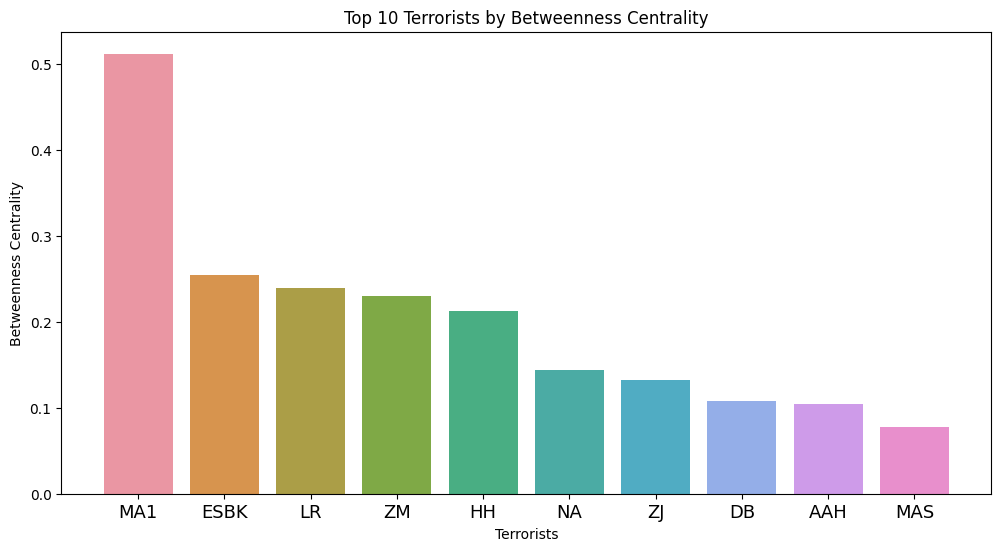

In [ ]:
# Call the custom plotting function
plot_degree_histogram(betweenness_centrality_list, labels, 10, "Betweenness Centrality")

## Eigenvector Centrality

Eigenvector centrality is an extension of degree centrality that takes this factor into account. Instead of just awarding one point for every network neighbour a node has, eigenvector centrality awards a number of points proportional to the centrality scores of the neighbours. The centrality of a node is proportional to the centrality of its neighbors. In a terrorist network, individuals with high eigenvector centrality may play crucial roles or hold significant influence, possibly acting as leaders in communication, decision-making, or coordination.

In [ ]:
eigenvector_centrality_list = sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True)

# Print the result with node labels
for node, centrality in eigenvector_centrality_list:
    print(f"Node {node} {labels[node]}: -> {centrality}")

Node 14 MA1: -> 0.4406323381142956
Node 13 MAS: -> 0.39425562954366544
Node 27 RBAS: -> 0.3456632634273138
Node 12 ZJ: -> 0.31125342837113157
Node 24 SB: -> 0.3029987266903129
Node 23 ZE: -> 0.2562417250801497
Node 28 AB: -> 0.21884549831618896
Node 25 MEM: -> 0.21180454219522407
Node 30 LR: -> 0.17340142614683515
Node 22 MD: -> 0.16245454587011376
Node 26 ZM: -> 0.1556598575748862
Node 21 MAAH: -> 0.13586902382164384
Node 38 IEBY: -> 0.129444586926874
Node 15 AAAO*: -> 0.12479926248039014
Node 53 ESBK: -> 0.09486855219750959
Node 11 FA: -> 0.07753660922222717
Node 40 AQ: -> 0.06879571688463386
Node 29 AKISAA: -> 0.06877105563795269
Node 41 DB: -> 0.06084469714344593
Node 59 KD: -> 0.05758821137155378
Node 39 TM: -> 0.051573919104885145
Node 9 AAH: -> 0.048085673888948785
Node 42 JC: -> 0.04565276801192653
Node 43 DC: -> 0.04565276801192653
Node 37 MB1: -> 0.04106262082979245
Node 16 WA1: -> 0.03924815163356979
Node 2 HH: -> 0.035768898346431065
Node 31 RMA: -> 0.03265216129002808
Node

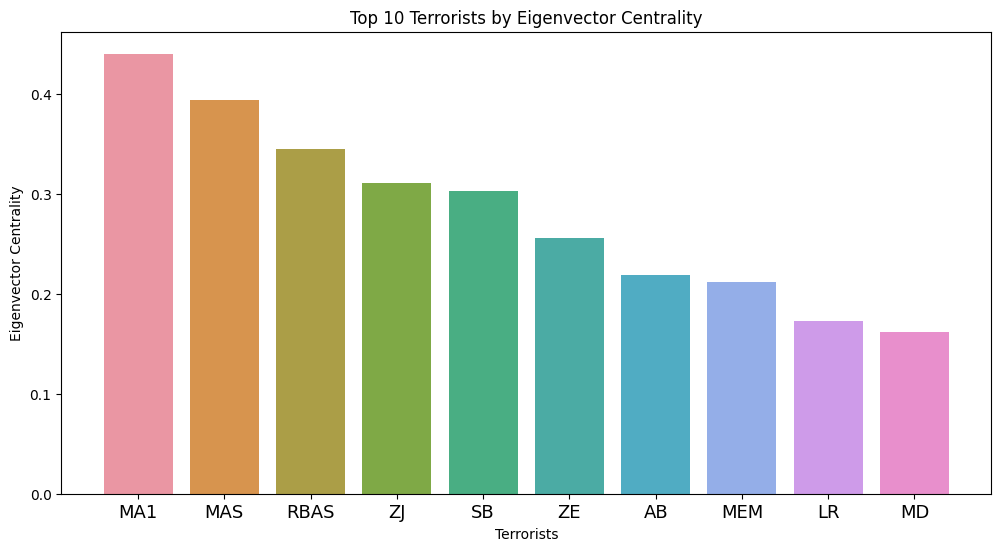

In [ ]:
# Call the custom plotting function
plot_degree_histogram(eigenvector_centrality_list, labels, 10, "Eigenvector Centrality")

## Assortativity by degree

The degree assortativity coefficient is a measure that quantifies the preference of a network for nodes to attach to others that have similar degrees. In other words, it provides information about the tendency of nodes with similar degrees to be connected to each other. The coefficient ranges from -1 to 1.

The negative degree assortativity coefficient (heterophily) indicates that the 9/11 hijackers network is disassortative. In other words, nodes with different degrees tend to be connected, creating star-like features in the network that are readily visible. Our network shows a tendency for high-degree, high-closeness, high-betweenness, and high-eigenvector nodes to connect with nodes that have lower values of these centrality measures. This might be indicative of a specific organizational or structural characteristic within the 9/11 hijackers network where certain individuals with high influence or centrality are connected to less central nodes. It could be influenced by various factors such as hierarchical organization or specific roles played by individuals in the network.

In [ ]:
nx.degree_assortativity_coefficient(G)

-0.14114486162935388

## Modularity and communities

Assortativity with respect to the total number of edges is called modularity, and it measures the extent to which similar nodes are likely to connect to each other (used to uncover the underlying structure of the network by identifying groups of nodes (individuals) that are more densely connected to each other than to the rest of the network). This analysis provides insights into the organization, dynamics, and potential functional roles of subgroups within the network. Communities may represent clusters of individuals with stronger ties, shared objectives, or similar roles within the organization.


In [ ]:
# Detect communities using the Louvain algorithm
partition = community.best_partition(G)

# Convert the partition dictionary to a list of sets representing communities
communities = []
for community_id in set(partition.values()):
    nodes_in_community = [node for node, comm_id in partition.items() if comm_id == community_id]
    communities.append(set(nodes_in_community))

# Compute modularity using the detected communities
modularity_value = nx.algorithms.community.modularity(G, communities)

print("Modularity:", modularity_value)
print()
communities

Modularity: 0.614784



[{38, 39, 40, 44, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58},
 {0, 2, 30, 31, 32, 33},
 {1, 3, 4, 5, 7, 8, 9, 10, 34, 35, 36},
 {26, 41, 42, 43, 45, 46, 47, 48, 59},
 {11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 27, 28, 29, 37},
 {6, 16, 17, 18, 19, 20}]

We show a graph with the nodes (individuals) grouped into their respective communities.

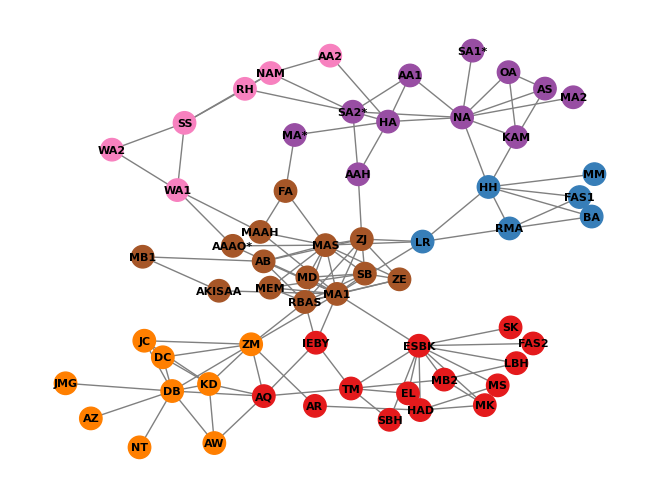

In [ ]:
# Assign unique colors based on the community partition
unique_community_ids = set(partition.values())
num_communities = len(unique_community_ids)

# Use a colormap to generate distinct colors for each community
cmap = plt.colormaps.get_cmap('Set1')
node_colors = [cmap(community_id / num_communities) for community_id in partition.values()]

# Draw the graph with node colors representing communities
nx.draw(G, pos, node_color=node_colors, with_labels=True, labels=labels, font_weight='bold', node_size=260, font_size=8, edge_color='gray')

# Display the plot
plt.show()

## K-Components

A k-component in a graph is a subgraph in which every pair of nodes is connected (each node is reachable from each of the others) by at least k node-independent paths. Identifying k-components can reveal isolated subgroups within the network. These subgroups may represent distinct operational units, cells, or communities within the larger network.


In [ ]:
# We define a custom plotting function to show the graph highlighting the various k-components.

def draw_k_components(graph, k_components, k_size):
    # Use Kamada-Kawai layout
    pos = nx.kamada_kawai_layout(graph)

    # Create a color map for each k-component
    color_map = {}
    for i, component in enumerate(k_components):
        for node in component:
            color_map[node] = plt.cm.rainbow(i / len(k_components))  # Use the same colormap

    # Draw the graph with nodes colored by k-component
    node_colors = [color_map.get(node, 'red') for node in graph.nodes]  # Assign red for nodes not in any k-component
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, labels=labels, cmap=plt.cm.rainbow, font_weight='bold', node_size=260, font_size=8)

    # Create a legend for the colors
    handles = []
    for i, component in enumerate(k_components):
        representative_node = next(iter(component))  # Take any node in the component as a representative
        handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[representative_node], markersize=10, label=f'Component {i+1}')
        handles.append(handle)

    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Not in any component'))
    plt.legend(handles=handles, fontsize="8", loc='upper left')

    plt.title(f'Graph with {k_size}-Components Colored')
    plt.show()


K-Components of size 3:
{8, 3, 5, 7}
{12, 13, 14, 22, 23, 24, 25, 27, 28, 30}
{1, 34, 3, 35}
{26, 40, 41, 42, 43, 45, 59}


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


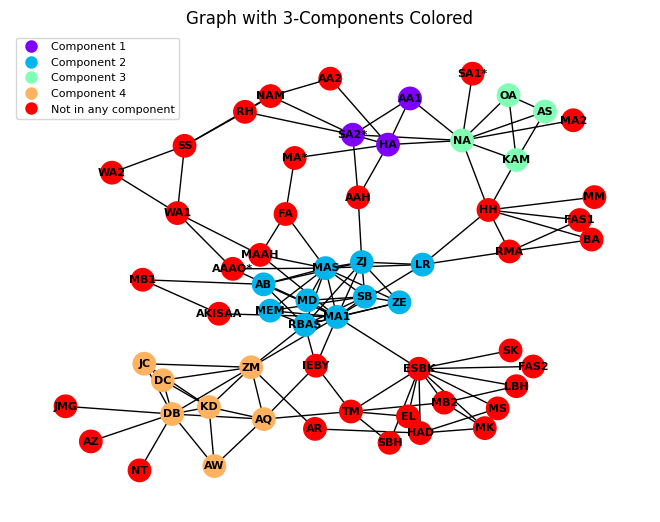

In [ ]:
# Print k-components of size K

K = 3
k_components = nx.k_components(G)
k_components_of_size_K = [component for component_size, components in k_components.items() if component_size == K for component in components]

print(f"K-Components of size {K}:")
for component in k_components_of_size_K:
    print(component)

k_components = [component for component_size, components in nx.k_components(G).items() if component_size == K for component in components]

# Draw k-components of size K
draw_k_components(G, k_components, K)

K-Components of size 5:
{23, 24, 27, 12, 13, 14}


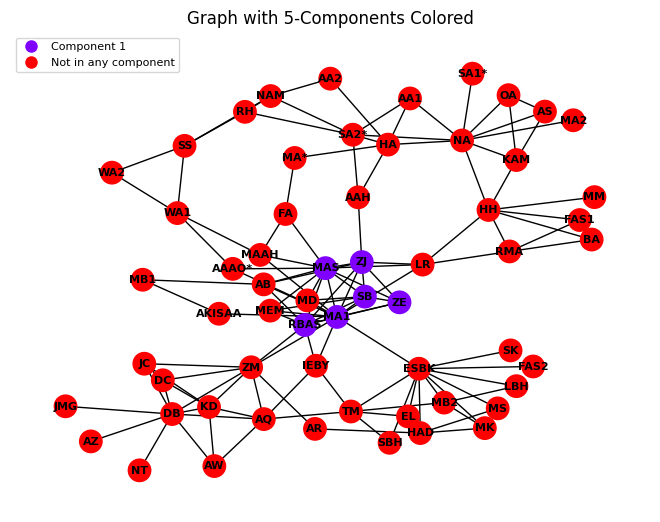

In [ ]:
# Print k-components of size K

K = 5
k_components = nx.k_components(G)
k_components_of_size_K = [component for component_size, components in k_components.items() if component_size == K for component in components]

print(f"K-Components of size {K}:")
for component in k_components_of_size_K:
    print(component)

k_components = [component for component_size, components in nx.k_components(G).items() if component_size == K for component in components]

# Draw k-components of size K
draw_k_components(G, k_components, K)

## Cliques

An N-clique is a subset of nodes within an undirected network such that every pair of nodes in the subset is connected by an edge.

N-cliques can reveal natural groupings or communities within the network. Nodes within an n-clique are highly interconnected, suggesting a strong internal cohesion. These communities may represent functional units, alliances, or closely collaborating groups within the larger network. N-cliques may represent subgraphs with specific functions or roles within the network.

In [ ]:
cliques = list(nx.find_cliques(G))

# Print cliques of size N
N = 5

cliques_of_size_N = [clique for clique in cliques if len(clique) == N]

print(f"Cliques of size {N}:")
for clique in cliques_of_size_N:
    initials = [names[node] for node in clique]
    print(initials)

# Print the maximum clique
N = 6

cliques_of_size_N = [clique for clique in cliques if len(clique) == N]

print()
print(f"Maximum cliques of size {N}:")
for clique in cliques_of_size_N:
    initials = [names[node] for node in clique]
    print(initials)

Cliques of size 5:
['MA1', 'MAS', 'ZJ', 'RBAS', 'AB']
['MA1', 'MAS', 'MEM', 'SB', 'RBAS']
['DB', 'KD', 'JC', 'ZM', 'DC']

Maximum cliques of size 6:
['MA1', 'MAS', 'ZJ', 'RBAS', 'SB', 'ZE']


## Las Vegas Meeting Analysis

We want to check if attendance at the Las Vegas Meeting correlates with specific network patterns. Identifying the nodes that attended the Las Vegas meeting might indicate the importance of certain individuals or groups in the context of the meeting.

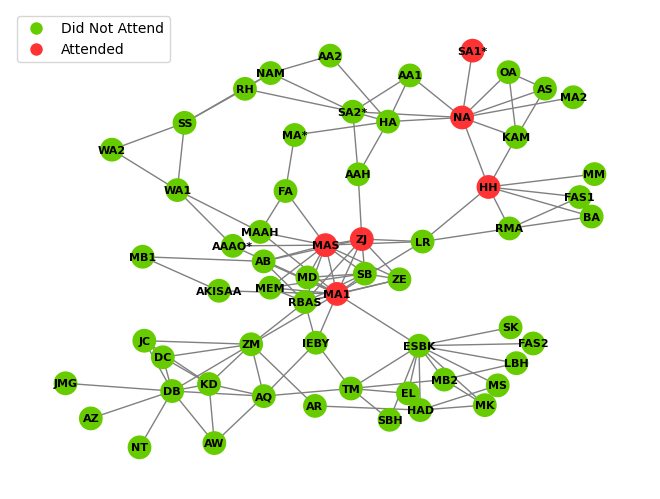

In [ ]:
# Get the "Las Vegas Meeting" column values as a dictionary for coloring nodes
attribute_values = df['Las Vegas Meeting'].to_dict()

# Define legend labels
legend_labels = {
    0: 'Did Not Attend',
    1: 'Attended'
}

# Define a custom colormap
colors = ['#66cc00', '#ff3333']
cmap = ListedColormap(colors)

pos = nx.kamada_kawai_layout(G)

# Visualization
labels = nx.get_node_attributes(G, 'name')
nx.draw(G, pos, node_color=list(attribute_values.values()), cmap=cmap, labels=labels, with_labels=True,
        font_weight='bold', node_size=260, font_size=8, edge_color='gray')

# Add a legend based on the "Ties" values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                          label=legend_labels[value]) for value, color in zip(sorted(df['Las Vegas Meeting'].unique()), colors)]

plt.legend(handles=legend_elements, loc='upper left', fontsize="10")

plt.show()